In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('weatherHistory.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
dataset.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
dataset.dropna(inplace = True)

In [7]:
dataset.drop(columns='Formatted Date',inplace=True)

In [8]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
from sklearn.preprocessing import LabelEncoder
le_sum = LabelEncoder()
le_pre = LabelEncoder()
le_daily = LabelEncoder()

In [10]:
dataset.select_dtypes(include='object').columns

Index(['Summary', 'Precip Type', 'Daily Summary'], dtype='object')

In [11]:
dataset['Summary'] = le_sum.fit_transform(dataset['Summary'])
dataset['Precip Type'] = le_pre.fit_transform(dataset['Precip Type'])
dataset['Daily Summary'] = le_daily.fit_transform(dataset['Daily Summary'])

In [12]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197


In [14]:
feature_scatter = dataset.drop('Precip Type',axis=1)

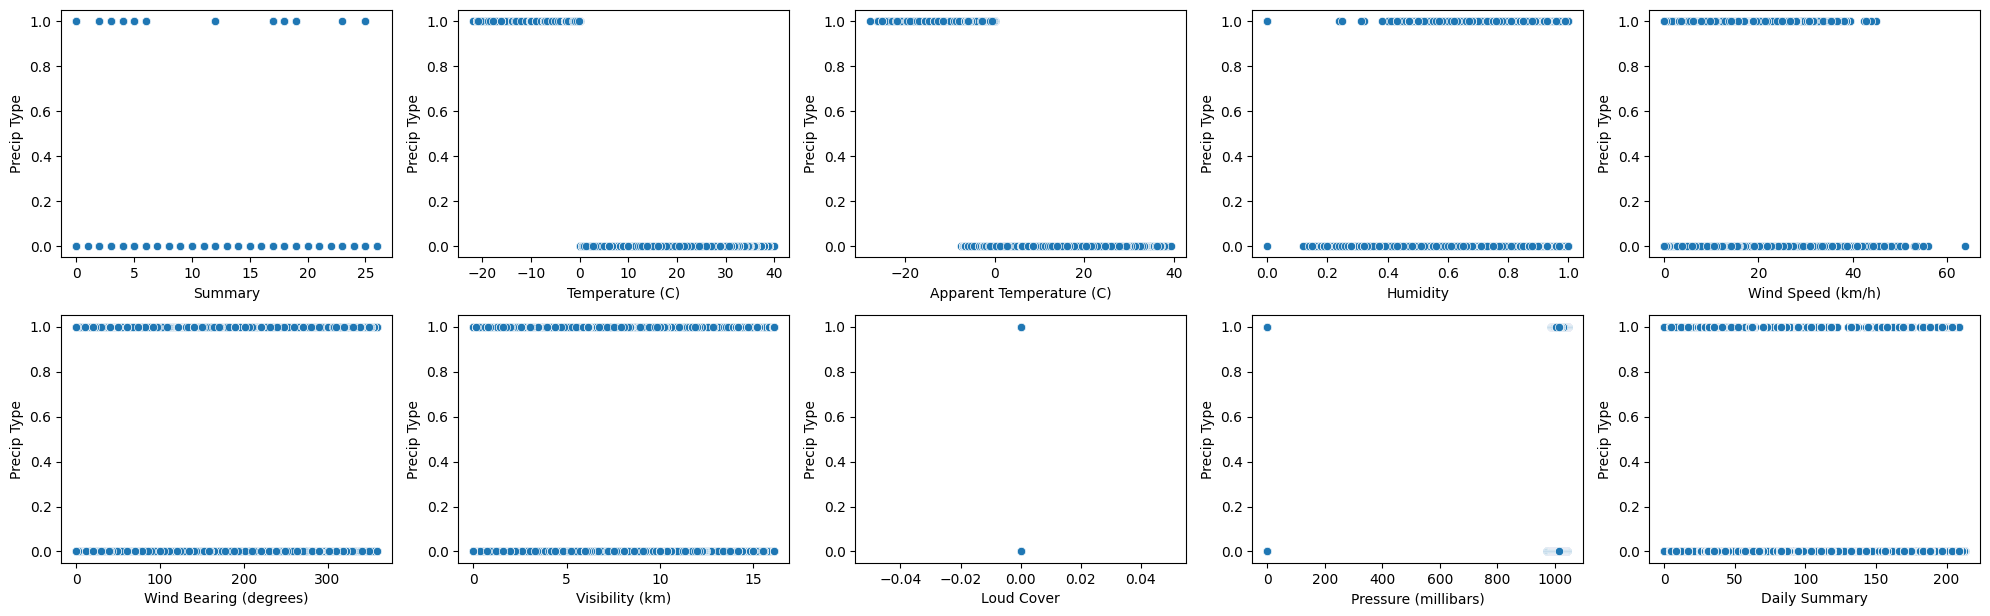

In [17]:
plt.figure(figsize=(20,15))
for i,j in enumerate(feature_scatter):
    plt.subplot(5,5,i+1)
    sns.scatterplot(x = dataset[j],y = dataset['Precip Type'])
    plt.xlabel(j)
    plt.ylabel('Precip Type')

plt.tight_layout()

In [18]:
correlation_matric = dataset.corr()

<Axes: >

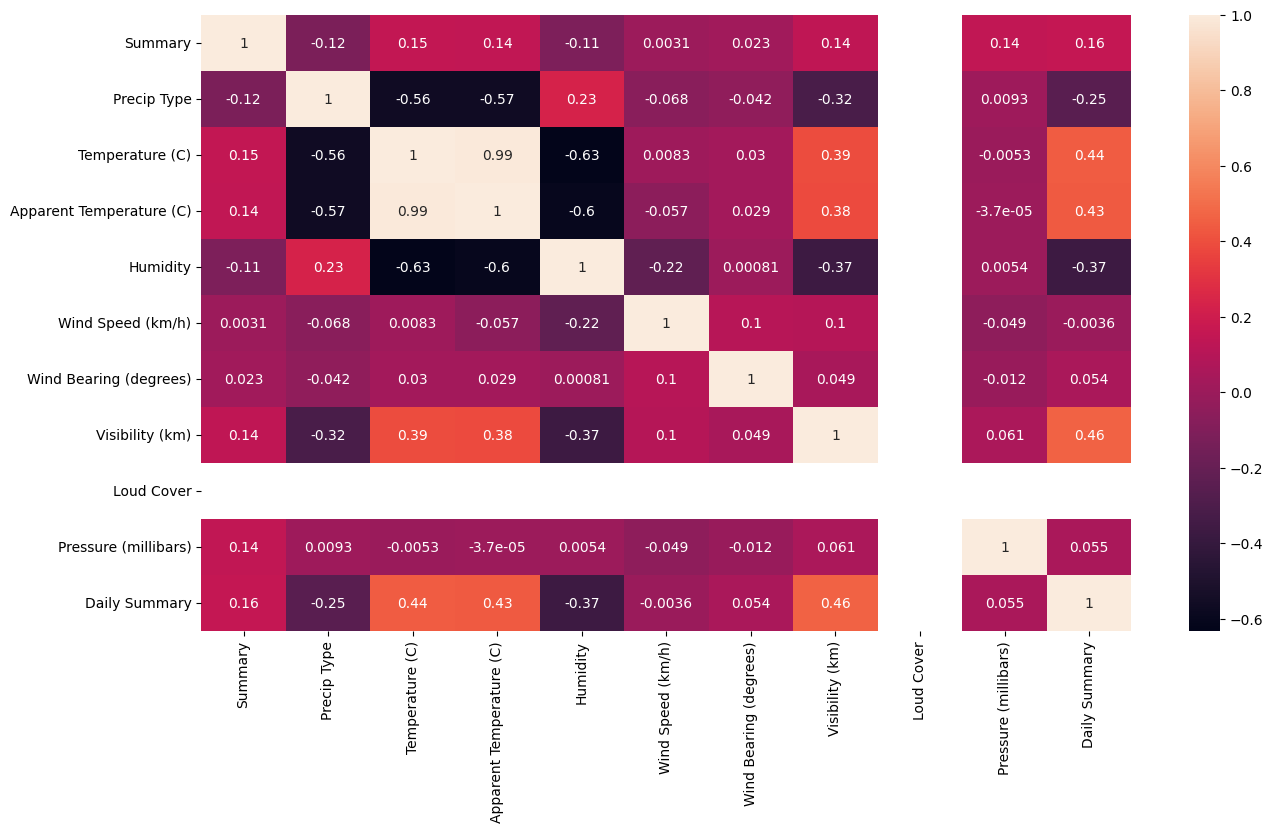

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matric,annot=True)

In [20]:
threshold = 0.6
correlated_feature = set()
for i in range(len(correlation_matric)):
    for j in range(i):
        if np.abs(correlation_matric.iloc[i,j]) > threshold:
            correlated_feature.add(correlation_matric.columns[j])

In [22]:
drop_feature = set()
for i in correlated_feature:
    if i in dataset:
        drop_feature.add(i)

In [38]:
dataset = pd.read_csv('weatherHistory.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [39]:
dataset.dropna(inplace = True)

In [40]:
dataset.drop(columns='Formatted Date',inplace=True)

In [41]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [42]:
dataset.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7573
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4971
Daily Summary                214
dtype: int64

In [43]:
category_feature = dataset.select_dtypes(include='object').columns
category_feature = ['Summary','Daily Summary']

In [44]:
dataset['Precip Type'] = le_pre.fit_transform(dataset['Precip Type'])

In [45]:
for i in category_feature:
    frequent = dataset[i].value_counts()
    dataset[f'{i}_frequent'] = dataset[i].map(frequent)

In [46]:
dataset.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Summary_frequent,Daily Summary_frequent
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,31635,9930
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,31635,9930
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,27914,9930
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,31635,9930
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,27914,9930


In [47]:
dataset.drop(columns=category_feature,inplace=True)

In [48]:
dataset.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_frequent,Daily Summary_frequent
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,31635,9930
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,31635,9930
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,27914,9930
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,31635,9930
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,27914,9930


In [49]:
x = dataset.drop('Precip Type',axis = 1)
y = dataset['Precip Type']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=33)

In [52]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\manic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.score(x_train,y_train)

0.9879830243466607

In [54]:
model.score(x_test,y_test)

0.9880824154824364

In [55]:
y_predict = model.predict(x_test)

In [56]:
accuracy_score(y_predict,y_test)

0.9880824154824364

In [58]:
model_all = make_pipeline(PolynomialFeatures(),StandardScaler(), VarianceThreshold(),LogisticRegression())
model_all.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('variancethreshold', VarianceThreshold()),
                ('logisticregression', LogisticRegression())])

In [59]:
y_predict_1 = model_all.predict(x_test)

In [60]:
accuracy_score(y_predict_1,y_test)

0.9956568569542407

In [64]:
test = np.array([[0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,31635,9930]])

In [65]:
test = pd.DataFrame(test)

In [66]:
model_all.predict(test)

C:\Users\manic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0])